In [1]:
# IMPORTS & SETUP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# visualization theme
sns.set_theme(style='whitegrid', palette='husl')
plt.rcParams['figure.figsize'] = (10, 6)

# Inline plotting for Jupyter notebooks
%matplotlib inline

In [2]:
# LOAD DATASET (robust)
DATA_PATH = Path("titanic.csv")
if not DATA_PATH.exists():
    raise FileNotFoundError(f"{DATA_PATH} not found. Place 'titanic.csv' in the notebook folder.")

df = pd.read_csv(DATA_PATH)
print('Loaded df shape:', df.shape)

Loaded df shape: (891, 12)


In [3]:
# UNDERSTANDING DATA
# STATISTICAL SUMMARY
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# EXPLORE
print('Dataframe shape:', df.shape)

Dataframe shape: (891, 12)


In [5]:
# EXPLORE
# Show concise info (prints to output in notebooks)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# EXPLORE
# Quick look at the first rows and dtypes
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# UNDERSTANDING DATA
# CHECK FOR MISSING VALUES
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

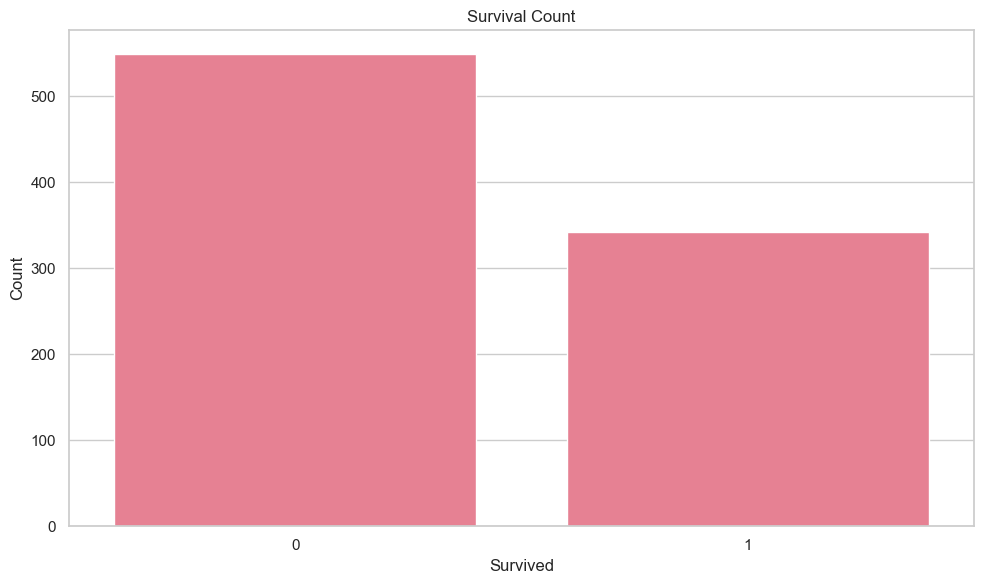

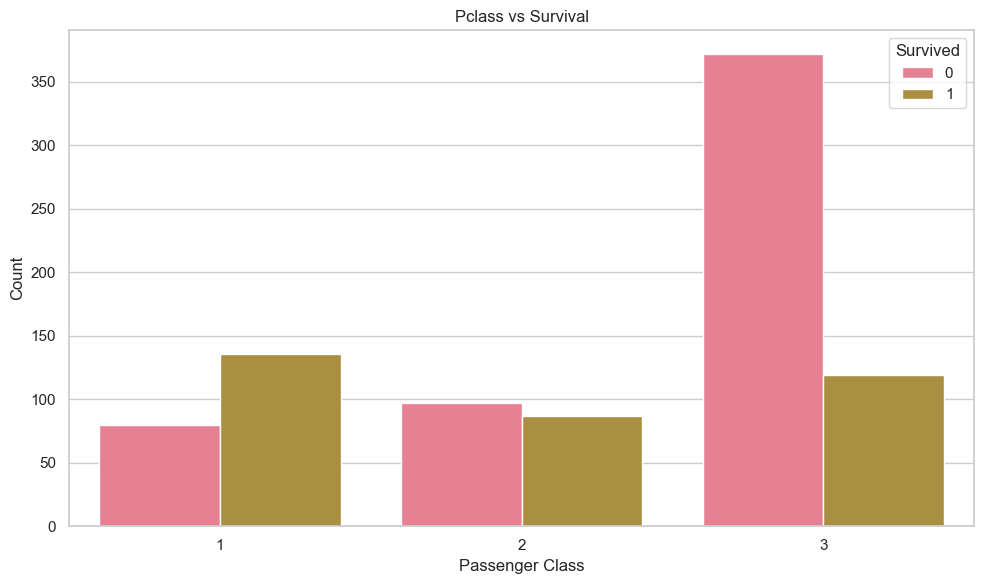

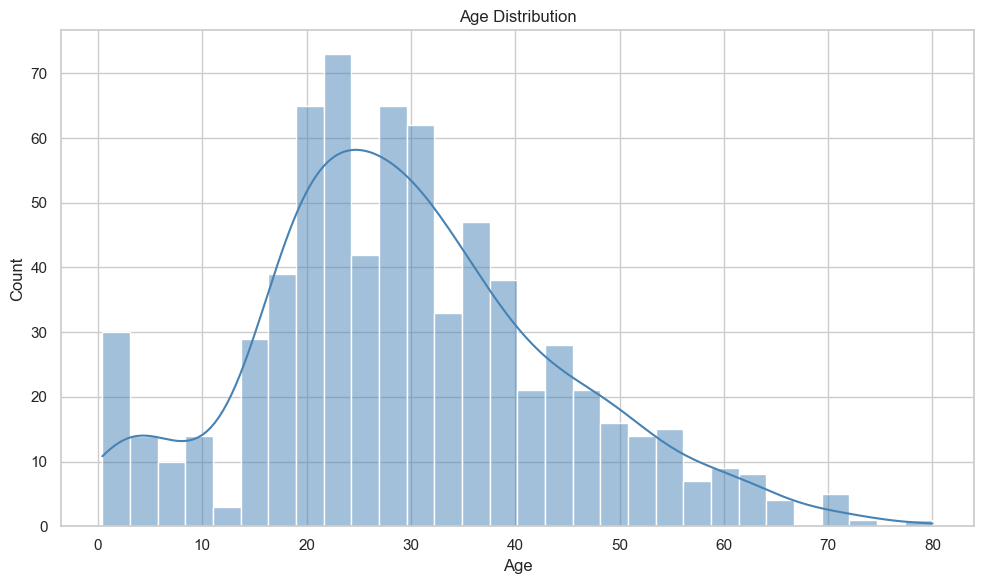

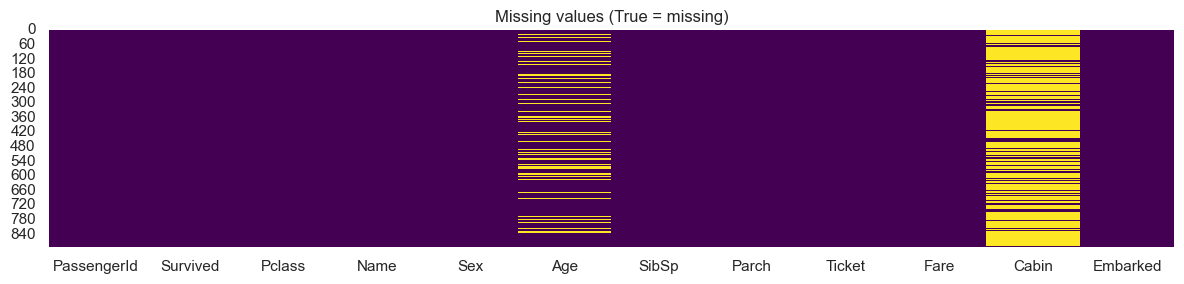

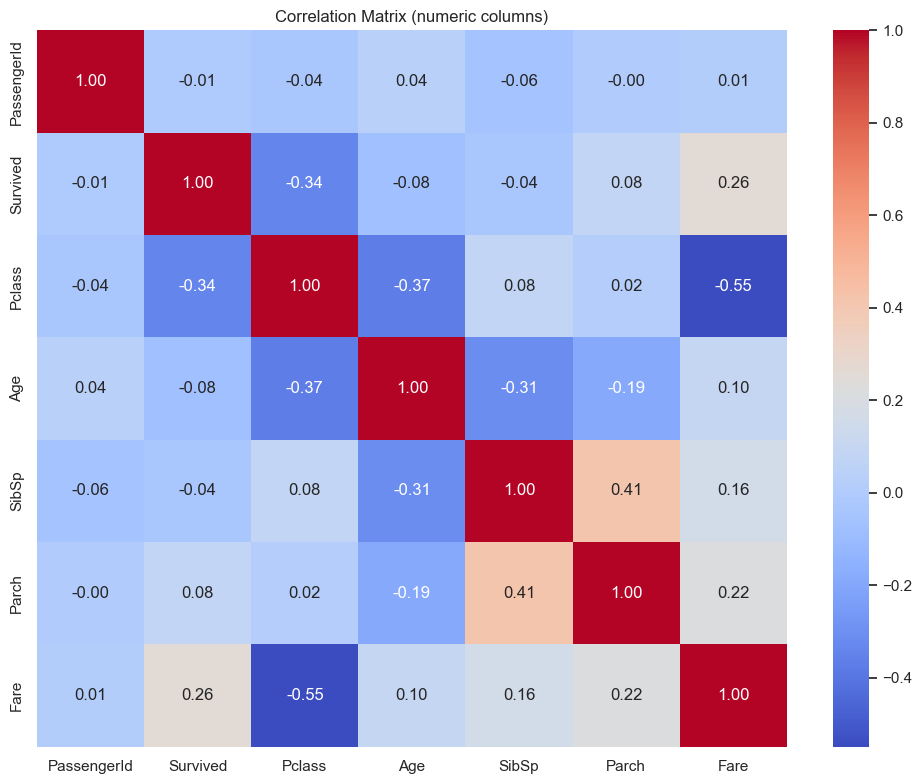

In [8]:
# VISUALIZATIONS
# Clean, reusable plotting functions for EDA

def plot_survival_counts(df):
    plt.figure()
    sns.countplot(x='Survived', data=df)
    plt.title('Survival Count')
    plt.xlabel('Survived')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    plt.close()


def plot_pclass_survival(df):
    plt.figure()
    sns.countplot(x='Pclass', hue='Survived', data=df)
    plt.title('Pclass vs Survival')
    plt.xlabel('Passenger Class')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    plt.close()


def plot_age_distribution(df):
    plt.figure()
    sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='steelblue')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    plt.close()


def plot_missing_heatmap(df):
    plt.figure(figsize=(12,3))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing values (True = missing)')
    plt.tight_layout()
    plt.show()
    plt.close()


def plot_correlation_matrix(df):
    plt.figure(figsize=(10,8))
    num_df = df.select_dtypes(include=["number"]).corr()
    sns.heatmap(num_df, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Matrix (numeric columns)')
    plt.tight_layout()
    plt.show()
    plt.close()

# Call plotting functions
plot_survival_counts(df)
plot_pclass_survival(df)
plot_age_distribution(df)
plot_missing_heatmap(df)
plot_correlation_matrix(df)
